### GOAL: 
Analyze the impact of economic and social conditions on countries' education wellbeing
* Economic wellbeing will be measured in PISA score (feature: rating) AND expenditure on education as a percentage of gdp (feature: expenditure_on _education_pct_gdp)

PISA - Programme for International Student Assessment, is a triennial international assessment that measures 15-year-old students' literacy skills in reading, mathematics, and science. It is organized by the Organisation for Economic Co-operation and Development (OECD) to evaluate how well education systems prepare students for real-world challenges. The assessment focuses on how well students can apply their knowledge, rather than just what they have memorized. 
* PISA score range: 0 to 1000 points (highest possible score)
* PISA score mean: 500 points
* PISA score standard seviation: 100 points



In [2121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


In [2122]:
# Reading into data file

df = pd.read_csv('economics_and_education_dataset_CSV.csv')
df

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,GIRL,370.0
630,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,TOT,377.0
631,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,BOY,388.0
632,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,GIRL,379.0


In [2123]:
# Display null/na count

print("Amount of null", df.isnull().sum())


Amount of null index_code                                 0
expenditure_on _education_pct_gdp         36
mortality_rate_infant                      0
gini_index                                97
gdp_per_capita_ppp                         0
inflation_consumer_prices                  0
intentional_homicides                     75
unemployment                               0
gross_fixed_capital_formation              0
population_density                         0
suicide_mortality_rate                     0
tax_revenue                               48
taxes_on_income_profits_capital           48
alcohol_consumption_per_capita           523
government_health_expenditure_pct_gdp      0
urban_population_pct_total                 0
country                                    0
time                                       0
sex                                        0
rating                                     0
dtype: int64


In [2124]:
# Data preprocessing


# Identify the columns with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()

# Fill those missing values with the mean
for col in columns_with_missing:
  df[col].fillna(df[col].mean(), inplace=True) # found out replacing missing data with mean or median is far better for model accuracy than mode is

string_columns = []
for col in df.columns:

    # If all values can be converted to numeric without errors,
    # consider it as a numeric column.
    if df[col].apply(pd.to_numeric, errors='coerce').notna().all():
        continue

    # Otherwise it's a string (categorical) column,
    string_columns.append(col)

# Convert the string to a numeric value using factorize 
for col in string_columns:
    df[col] = pd.factorize(df[col])[0]

 # Store country name tags
countries = pd.factorize(df['country'])[1] # Incase I need it

/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/4094922644.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True) # found out replacing missing data with mean or median is far better for model accuracy than mode is


expenditure_on _education_pct_gdp        1.000000
government_health_expenditure_pct_gdp    0.397678
tax_revenue                              0.357036
urban_population_pct_total               0.317562
gdp_per_capita_ppp                       0.127724
rating                                   0.102876
taxes_on_income_profits_capital          0.093670
suicide_mortality_rate                   0.063159
intentional_homicides                    0.021474
alcohol_consumption_per_capita           0.018138
sex                                      0.001633
inflation_consumer_prices               -0.019516
country                                 -0.019554
time                                    -0.032166
gross_fixed_capital_formation           -0.079921
mortality_rate_infant                   -0.094983
unemployment                            -0.212763
population_density                      -0.220577
gini_index                              -0.224561
Name: expenditure_on _education_pct_gdp, dtype: fl

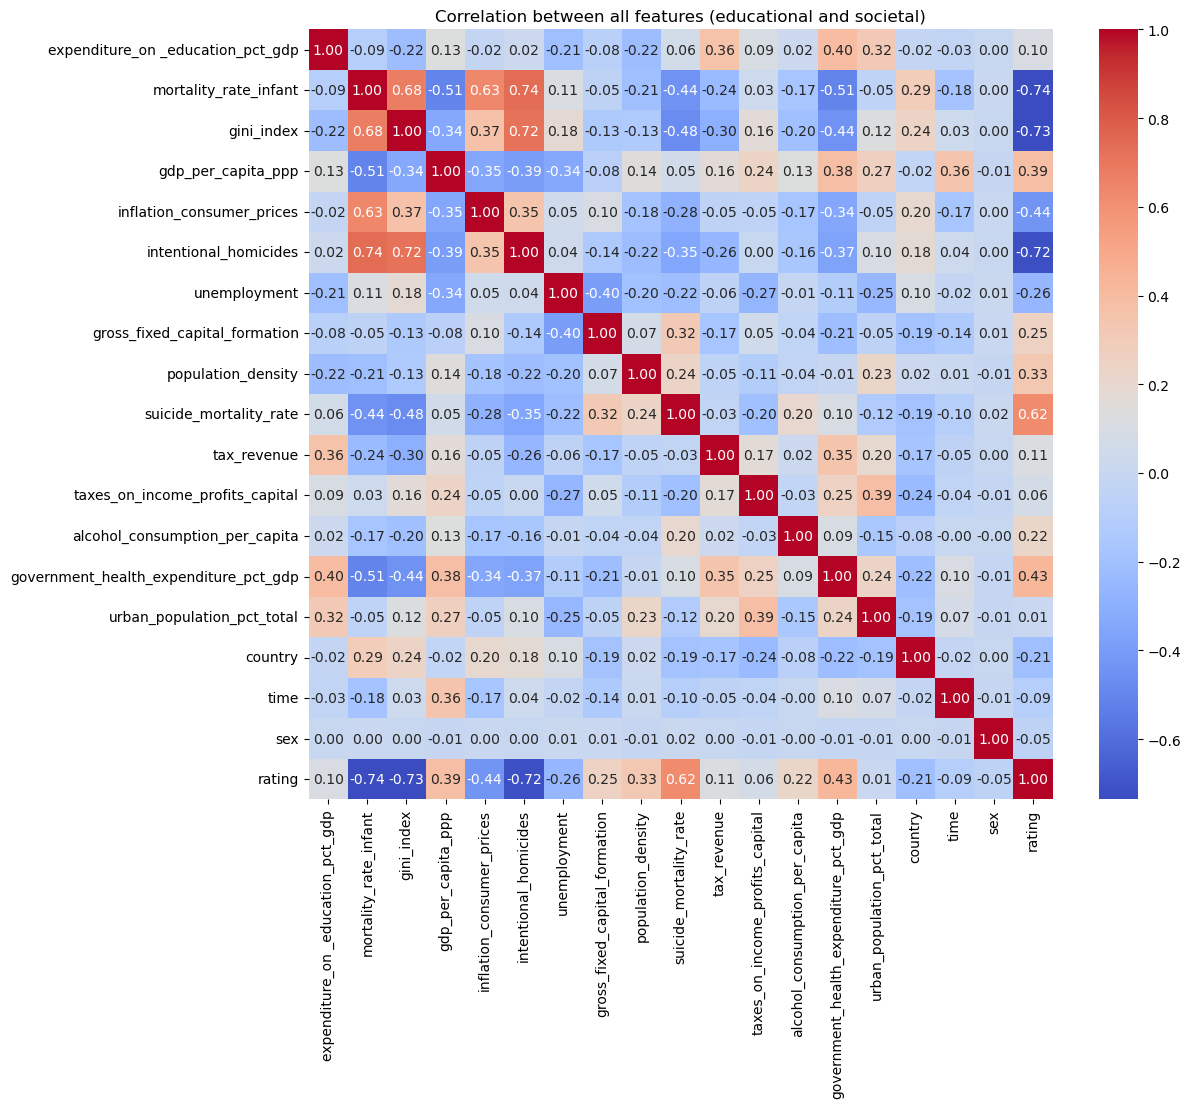

In [2125]:
# Find highest correlating values

data = df[df.columns[1:]] # doens't include 'index_code' because it's the same as 'country' and 'time' features
print(data.corr()["expenditure_on _education_pct_gdp"].sort_values(ascending=False))
print("---------------------------")
print(data.corr()["rating"].sort_values(ascending=False))


# Using a seaborn heatmap for better visualization of all correlations in the data set
# sns.heatmap parameters: 
# df[df.columns[1:]].corr() is all correlations excluding index_code because it is already covered for
# annot=True displays the numbers in the boxes
# fmt=".2f" formats the text to 2 decimal places
# cmap="coolwarm" changes color scheme
import seaborn as sns
plt.figure(figsize=(12,10)) # Changes size of figure
sns.heatmap(df[df.columns[1:]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between all features (educational and societal)")
plt.show()



In [2126]:
# Selecting features with a high correlation to eduction expenditure as a percentage of gdp and PISA rating
X_features = ['country', 
              'tax_revenue', 
              'taxes_on_income_profits_capital', 
              'intentional_homicides', 
              'gini_index', 
              'time', 
              'mortality_rate_infant', 
              'gdp_per_capita_ppp', 
              'unemployment',
              'suicide_mortality_rate',
              'government_health_expenditure_pct_gdp',
              'population_density', 
              'gross_fixed_capital_formation',
              'alcohol_consumption_per_capita']
# X_features = [df.columns[1:-1]] # Uncomment to fit model to entire dataset

# Creating testing and training data
X = df[X_features]
y = df['rating'].ravel() # ensures fully unwrapped result data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split training and testing data to a 80% and 20% split


/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/503385682.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df['rating'].ravel() # ensures fully unwrapped result data


In [2127]:
# Regressor baselines
mean_model = DummyRegressor(strategy="mean")
median_model = DummyRegressor(strategy="median")

# Print baseline tests
print("Baseline Tests:\nMean K-fold Test:", cross_val_score(mean_model, X, y).mean())
print("Median K-fold Test:", cross_val_score(median_model, X, y).mean())


# Evaluating a linear regression model
linear_model = LinearRegression() # declare model
linear_model.fit(X_train, y_train) # training model
y_hat = linear_model.predict(X_test) # predict using model

# Print My model's tests
print("\nMy model test:\nMean squared error:", mean_squared_error(y_test, y_hat))

print("K-fold Test:", cross_val_score(linear_model, X, y).mean()) # I learned that default scoring is R^2
print("Standard R^2:", linear_model.score(X_test, y_test)) # I leared R^2 is default test. Same as using r2_score from sklearn.metrics

Baseline Tests:
Mean K-fold Test: -0.11314423867810249
Median K-fold Test: -0.08351284497833125

My model test:
Mean squared error: 235.8308914483598
K-fold Test: 0.612043014230359
Standard R^2: 0.8513044393145877


### NOTE
Turns out baselines aren't too hard to beat with regressions haha. 
My model is has a decent deterministic scores of with around .61 R^2 K-fold and .80 standard R^2 metrics. I think that's the perfect balance between accuracy without overfitting.

I also realized that training the model solely on features with high correlations doesn't produce a model that much more accurate than testing 

[ 3.09042087e-01 -9.41103588e-01  5.99472307e-01 -8.88858126e-01
 -1.98016312e+00 -7.50659819e-01 -2.61659725e+00  5.11522808e-05
 -5.39648909e-03  1.58854268e+00  2.24484497e+00  3.88759001e-02
  6.89281516e-01  1.45659752e+00]


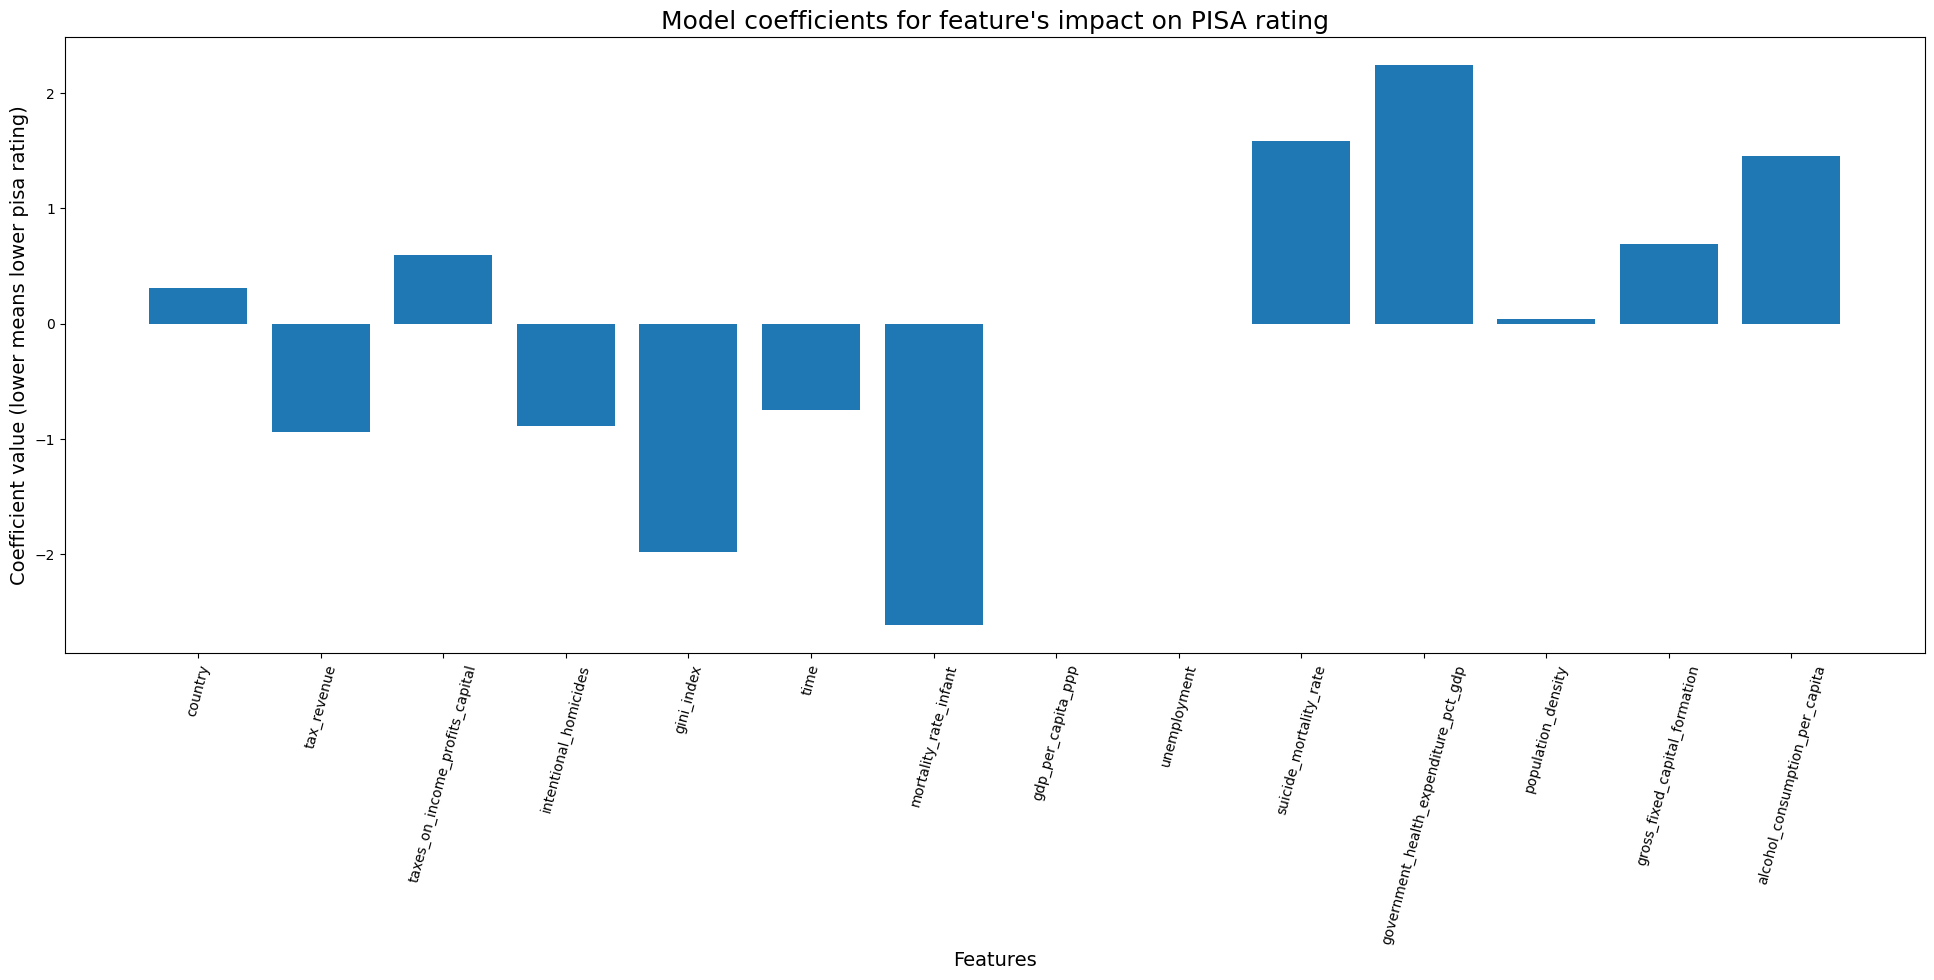

In [2128]:
# Gather coefficients to determine correlation
coefficients = linear_model.coef_
print(coefficients)

# Plotting coefficients
plt.figure(figsize=(24,8))
plt.bar(X_features, coefficients)
plt.title("Model coefficients for feature's impact on PISA rating", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient value (lower means lower pisa rating)", fontsize=14)
plt.xticks(rotation=75)  # rotate labels 45 degrees for readability
plt.show()

### LIMITATION:
* PISA scores are individually by subject (math, science, and reading) whereas this dataset only  the mean score per country within a the 5 tests taken from 2003 to 2018. 
* This data set also only includes 39 of the 79 countries that have taken the PISA exam from 2003 to 2018
* Missingvalues are replaced by the mean values within each column. This impacts data validity; espcially with the measurement of alcohol consumption per capita (Feature: alcohol_consumption_per_capita), which has most of its values missing.